<a href="https://colab.research.google.com/github/KalyanMohanty/Tensorflow_series/blob/master/Basic_classification_Classify_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels.shape

(60000,)

In [10]:
test_images.shape

(10000,)

In [11]:
test_labels.shape

(10000,)

In [12]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

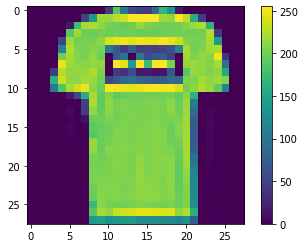

In [13]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images/255.0
test_images = test_images/ 255.0

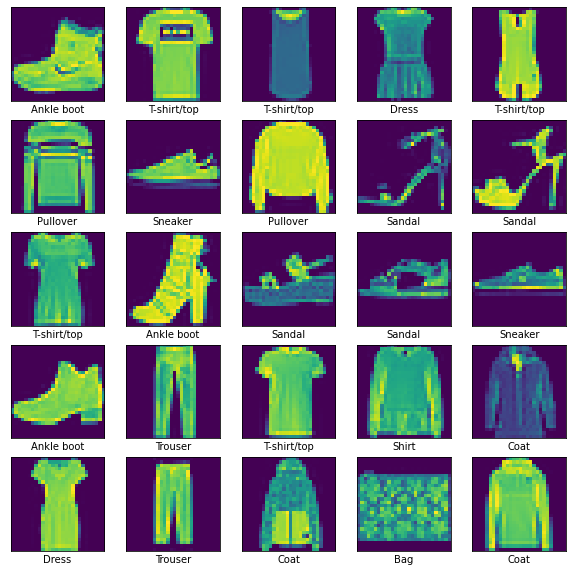

In [25]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28))
                          , keras.layers.Dense(128, activation = 'relu')
                          , keras.layers.Dense(10)
                          ])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4972 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3723 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3366 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3099 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2791 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2551 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2479 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [32]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3336 - accuracy: 0.8825

Test accuracy: 0.8824999928474426


### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [0]:
probability_model = keras.Sequential([model, tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model(test_images)

In [38]:
predictions[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([5.4398464e-10, 1.7978570e-11, 3.7196267e-11, 4.7095435e-11,
       1.7775758e-11, 1.1519929e-04, 2.7777048e-08, 4.8192052e-04,
       3.4528899e-08, 9.9940288e-01], dtype=float32)>

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [39]:
np.argmax(predictions[0])

9

In [40]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.
Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

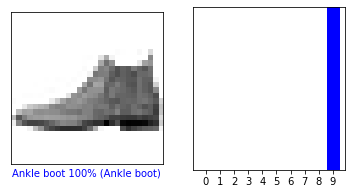

In [53]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

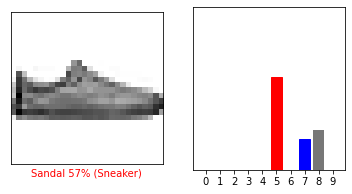

In [54]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


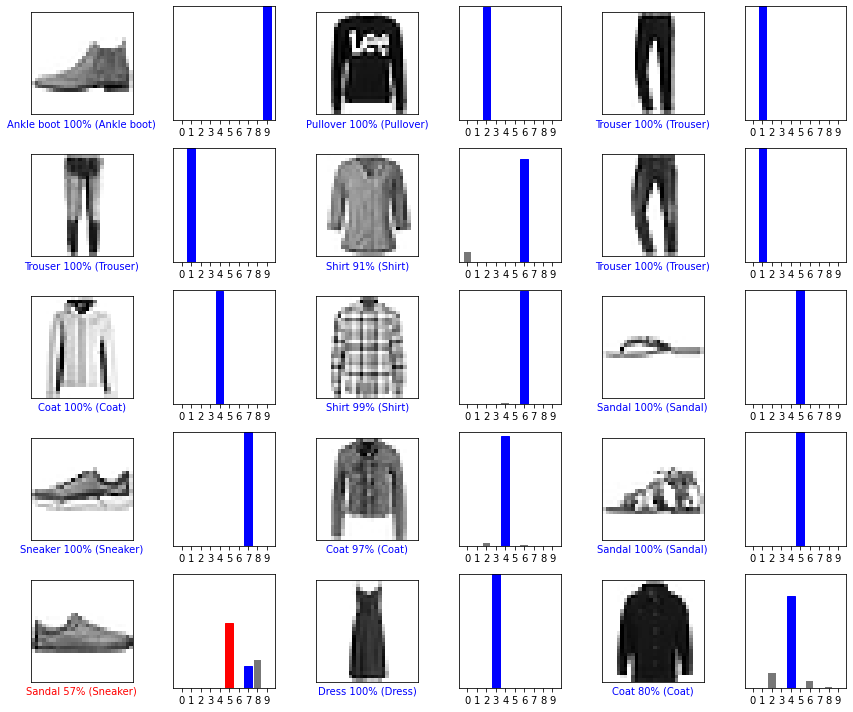

In [55]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [60]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [61]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [62]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[8.3825515e-05 1.4142836e-12 9.9608898e-01 6.6303113e-12 3.6397250e-03
  1.3185778e-14 1.8754452e-04 9.0938975e-13 8.5629381e-10 7.1529979e-16]]


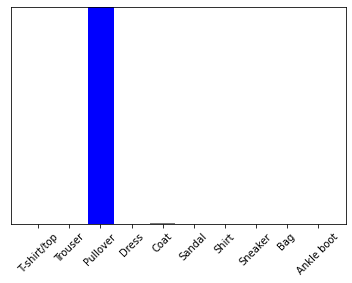

In [63]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [64]:
np.argmax(predictions_single[0])

2